# **Dataset Preparation CIFAR-10**

- The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms.
- It is one of the most widely used datasets for machine learning research.
- The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.
- The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import cifar10
# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


## Exploring the dataset images

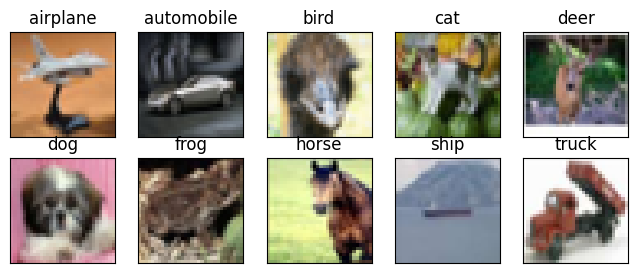

In [3]:
#Visualizing images for each class in the dataset

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])

    #Get 1st image row id for each class
    idx = np.where(y_train[:]==i)[0]

    # Select a random image from the training set
    ax.set_title(class_names[i])
    # Plot the image
    plt.imshow(x_train[idx,::][np.random.randint(0, 3000)])


plt.show()

## Preprocessing

### Normalize
- Convert image features to a 0-1 scale, from a 0-255 scale, by dividing with the maximum (255)
- Data normalization is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network.

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### One-hot encoding - Convert class labels to binary class labels
- Converting multiclass target column into multiple binary target columns for using in a Machine Learning Model
- The classifier will be a multi-class classifier

In [5]:
# Applying the function to training set labels and testing set labels
from tensorflow.keras.utils import to_categorical

# Assuming you have integer labels in y_train and y_test
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Model Training

In [37]:
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras import Sequential
# Define the model

#Initialize the model
model = Sequential()


model.add(Conv2D(48, (3, 3), padding='same', input_shape=(32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 512, activation = 'relu'))

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                           batch_size=128, epochs=10,
                           validation_data = (x_test, y_test))

In [39]:
history_2 =model.fit(x_train, y_train,
                           batch_size=64, epochs=20,
                           validation_data = (x_test, y_test))

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 0.7175 - accuracy: 0.7472 - val_loss: 0.8724 - val_accuracy: 0.6989
Epoch 2/20
782/782 [==============================] - 5s 7ms/step - loss: 0.6696 - accuracy: 0.7634 - val_loss: 0.8499 - val_accuracy: 0.7118
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.6336 - accuracy: 0.7786 - val_loss: 0.7962 - val_accuracy: 0.7300
Epoch 4/20
782/782 [==============================] - 6s 7ms/step - loss: 0.5922 - accuracy: 0.7921 - val_loss: 0.8229 - val_accuracy: 0.7242
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.5620 - accuracy: 0.7997 - val_loss: 0.8242 - val_accuracy: 0.7247
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.5353 - accuracy: 0.8087 - val_loss: 0.8220 - val_accuracy: 0.7330
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.5195 - accuracy: 0.8147 - val_loss: 0.8173 - val_accuracy: 0.7312
Epoch 

Try Larger Model

In [55]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(10, activation='softmax'))

# Compile the model
learning_rate = 0.001
adam = tf.keras.optimizers.Adam(lr=learning_rate)
model_2.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train model_2
batch_size = 128
epochs = 20
history= model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 9s 17ms/step - loss: 1.6244 - accuracy: 0.4029 - val_loss: 1.3062 - val_accuracy: 0.5252
Epoch 2/20
391/391 [==============================] - 5s 14ms/step - loss: 1.1984 - accuracy: 0.5715 - val_loss: 1.0191 - val_accuracy: 0.6345
Epoch 3/20
391/391 [==============================] - 6s 15ms/step - loss: 1.0049 - accuracy: 0.6433 - val_loss: 0.8714 - val_accuracy: 0.6969
Epoch 4/20
391/391 [==============================] - 5s 14ms/step - loss: 0.8931 - accuracy: 0.6847 - val_loss: 0.8362 - val_accuracy: 0.7066
Epoch 5/20
391/391 [==============================] - 6s 15ms/step - loss: 0.8045 - accuracy: 0.7163 - val_loss: 0.7730 - val_accuracy: 0.7272
Epoch 6/20
391/391 [==============================] - 5s 14ms/step - loss: 0.7488 - accuracy: 0.7372 - val_loss: 0.7130 - val_accuracy: 0.7508
Epoch 7/20
391/391 [==============================] - 6s 15ms/step - loss: 0.6891 - accuracy: 0.7595 - val_loss: 0.6716 - val_accuracy: 0.7656

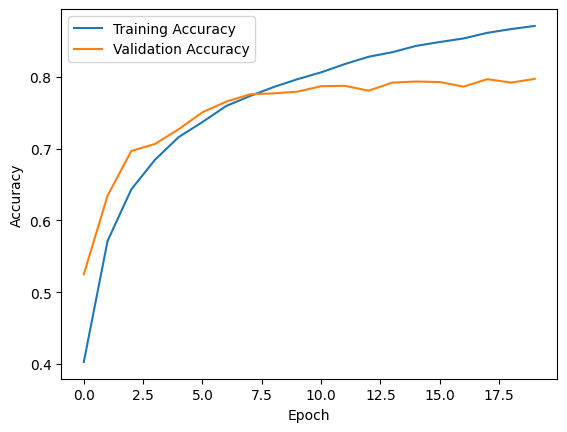

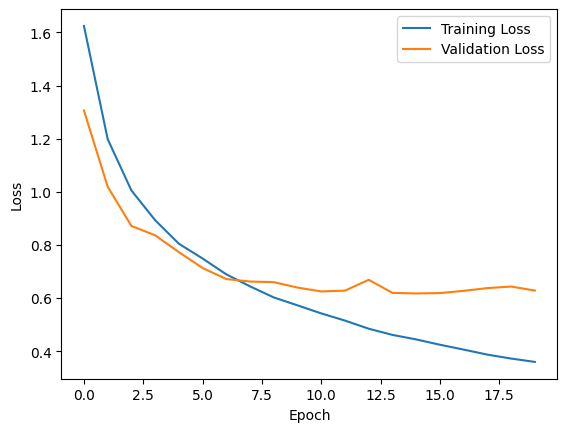

In [56]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
print(f"Test accuracy: {model_2.evaluate(x_test, y_test)}")

313/313 [==============================] - 2s 4ms/step - loss: 0.6282 - accuracy: 0.7973
Test accuracy: [0.6282196044921875, 0.7972999811172485]


Save The Best Model

In [77]:
model_2.save('Image_Classification_Model.h5')

In [80]:
import pickle
filename = 'Image_Classification_Model.pkl'
pickle.dump(model_2, open(filename, 'wb'))